In [ ]:
# 1 Poisson Arrival, Exponential Service Times
import numpy as np
from scipy.stats import norm
from math import factorial
import matplotlib.pyplot as plt
import pandas as pd

# Parameter
m = 10  
mean_service_time = 8 
mean_interarrival_time = 1
num_runs = 10
customers_per_run = 10000
total_customers = num_runs * customers_per_run

def erlang_b_formula(A, m):
    inv_b = sum((A**k) / factorial(k) for k in range(m + 1))
    return (A**m) / factorial(m) / inv_b

blocked_fractions = []

for _ in range(num_runs):
    arrival_times = np.cumsum(np.random.exponential(scale=mean_interarrival_time, size=customers_per_run))
    service_times = np.random.exponential(scale=mean_service_time, size=customers_per_run)

    service_end_times = []
    blocked = 0

    for arrival, service in zip(arrival_times, service_times):
        service_end_times = [t for t in service_end_times if t > arrival]
        
        if len(service_end_times) < m:
            service_end_times.append(arrival + service)
        else:
            blocked += 1

    blocked_fraction = blocked / customers_per_run
    blocked_fractions.append(blocked_fraction)
mean_blocked = np.mean(blocked_fractions)
std_blocked = np.std(blocked_fractions, ddof=1)
conf_interval = norm.interval(0.95, loc=mean_blocked, scale=std_blocked / np.sqrt(num_runs))

A = 8 
B_exact = erlang_b_formula(A, m)

result = {
    "Mean Blocked Fraction": mean_blocked,
    "95% Confidence Interval Lower": conf_interval[0],
    "95% Confidence Interval Upper": conf_interval[1],
    "Exact Erlang B Value": B_exact
}



In [4]:
result

{'Mean Blocked Fraction': 0.12129000000000001,
 '95% Confidence Interval Lower': 0.11788802717730434,
 '95% Confidence Interval Upper': 0.12469197282269567,
 'Exact Erlang B Value': 0.12166106425295149}

In [8]:
# 2
m = 10
mean_service_time = 8
mean_interarrival_time = 1
num_runs = 10
customers_per_run = 10000
A = 8  

def erlang_b_formula(A, m):
    inv_b = sum((A**k) / factorial(k) for k in range(m + 1))
    return (A**m) / factorial(m) / inv_b

#arrival
shape_param = 2
lambda_erlang = shape_param 
scale_erlang = 1 / lambda_erlang

blocked_fractions_erlang = []

for _ in range(num_runs):
    interarrival_times = np.random.gamma(shape=shape_param, scale=scale_erlang, size=customers_per_run)
    arrival_times = np.cumsum(interarrival_times)
    service_times = np.random.exponential(scale=mean_service_time, size=customers_per_run)

    service_end_times = []
    blocked = 0

    for arrival, service in zip(arrival_times, service_times):
        service_end_times = [t for t in service_end_times if t > arrival]

        if len(service_end_times) < m:
            service_end_times.append(arrival + service)
        else:
            blocked += 1

    blocked_fraction = blocked / customers_per_run
    blocked_fractions_erlang.append(blocked_fraction)


mean_blocked = np.mean(blocked_fractions_erlang)
std_blocked = np.std(blocked_fractions_erlang, ddof=1)
conf_interval = norm.interval(0.95, loc=mean_blocked, scale=std_blocked / np.sqrt(num_runs))
B_exact = erlang_b_formula(A, m)


result2a = {
    "Mean Blocked Fraction": mean_blocked,
    "95% Confidence Interval Lower": conf_interval[0],
    "95% Confidence Interval Upper": conf_interval[1],
    "Exact Erlang B Value": B_exact
}


In [9]:
result2a

{'Mean Blocked Fraction': 0.09706000000000001,
 '95% Confidence Interval Lower': 0.09240532509403525,
 '95% Confidence Interval Upper': 0.10171467490596477,
 'Exact Erlang B Value': 0.12166106425295149}

In [10]:
# Hyper-exponential parameters
p1, lambda1 = 0.8, 0.8333
p2, lambda2 = 0.2, 5.0

blocked_fractions_hyper = []

for _ in range(num_runs):
    choice = np.random.rand(customers_per_run) < p1
    interarrival_times = np.where(choice,
                                  np.random.exponential(scale=1/lambda1, size=customers_per_run),
                                  np.random.exponential(scale=1/lambda2, size=customers_per_run))
    arrival_times = np.cumsum(interarrival_times)
    service_times = np.random.exponential(scale=mean_service_time, size=customers_per_run)

    service_end_times = []
    blocked = 0

    for arrival, service in zip(arrival_times, service_times):
        service_end_times = [t for t in service_end_times if t > arrival]

        if len(service_end_times) < m:
            service_end_times.append(arrival + service)
        else:
            blocked += 1

    blocked_fraction = blocked / customers_per_run
    blocked_fractions_hyper.append(blocked_fraction)
mean_blocked = np.mean(blocked_fractions_hyper)
std_blocked = np.std(blocked_fractions_hyper, ddof=1)
conf_interval = norm.interval(0.95, loc=mean_blocked, scale=std_blocked / np.sqrt(num_runs))
B_exact = erlang_b_formula(A, m)

result2b = {
    "Mean Blocked Fraction": mean_blocked,
    "95% Confidence Interval Lower": conf_interval[0],
    "95% Confidence Interval Upper": conf_interval[1],
    "Exact Erlang B Value": B_exact
}

In [11]:
result2b

{'Mean Blocked Fraction': 0.13794,
 '95% Confidence Interval Lower': 0.13511901327671505,
 '95% Confidence Interval Upper': 0.14076098672328496,
 'Exact Erlang B Value': 0.12166106425295149}

In [12]:
#3 

def simulate_blocking(custom_service_times_func):
    blocked_fractions = []

    for _ in range(num_runs):
        interarrival_times = np.random.exponential(scale=mean_interarrival_time, size=customers_per_run)
        arrival_times = np.cumsum(interarrival_times)
        service_times = custom_service_times_func(size=customers_per_run)

        service_end_times = []
        blocked = 0

        for arrival, service in zip(arrival_times, service_times):
            service_end_times = [t for t in service_end_times if t > arrival]

            if len(service_end_times) < m:
                service_end_times.append(arrival + service)
            else:
                blocked += 1

        blocked_fractions.append(blocked / customers_per_run)

    return np.mean(blocked_fractions), np.std(blocked_fractions, ddof=1)
mean_const = mean_service_time
constant_service_times = lambda size: np.full(size, mean_const)
def pareto_service_times(k):
    scale = mean_service_time * (k - 1) / k  # to get desired mean
    return lambda size: (np.random.pareto(k, size) + 1) * scale
results = []
mean_blocked, std_blocked = simulate_blocking(constant_service_times)
conf = norm.interval(0.95, loc=mean_blocked, scale=std_blocked / np.sqrt(num_runs))
results.append({
    "Service Time": "Constant",
    "Mean Blocked Fraction": mean_blocked,
    "95% CI Lower": conf[0],
    "95% CI Upper": conf[1]
})

# (b) Pareto k=1.05
mean_blocked, std_blocked = simulate_blocking(pareto_service_times(1.05))
conf = norm.interval(0.95, loc=mean_blocked, scale=std_blocked / np.sqrt(num_runs))
results.append({
    "Service Time": "Pareto (k=1.05)",
    "Mean Blocked Fraction": mean_blocked,
    "95% CI Lower": conf[0],
    "95% CI Upper": conf[1]
})

# (b) Pareto k=2.05
mean_blocked, std_blocked = simulate_blocking(pareto_service_times(2.05))
conf = norm.interval(0.95, loc=mean_blocked, scale=std_blocked / np.sqrt(num_runs))
results.append({
    "Service Time": "Pareto (k=2.05)",
    "Mean Blocked Fraction": mean_blocked,
    "95% CI Lower": conf[0],
    "95% CI Upper": conf[1]
})

# Erlang B for Poisson benchmark
B_exact = erlang_b_formula(A, m)

# Add exact value to each result
for r in results:
    r["Exact Erlang B"] = B_exact

# Show results
results3 = pd.DataFrame(results)


In [13]:
results3

,Service Time,Mean Blocked Fraction,95% CI Lower,95% CI Upper,Exact Erlang B
0,Constant,0.12124,0.118292,0.124188,0.121661
1,Pareto (k=1.05),0.00061,0.000295,0.000925,0.121661
2,Pareto (k=2.05),0.12153,0.116967,0.126093,0.121661


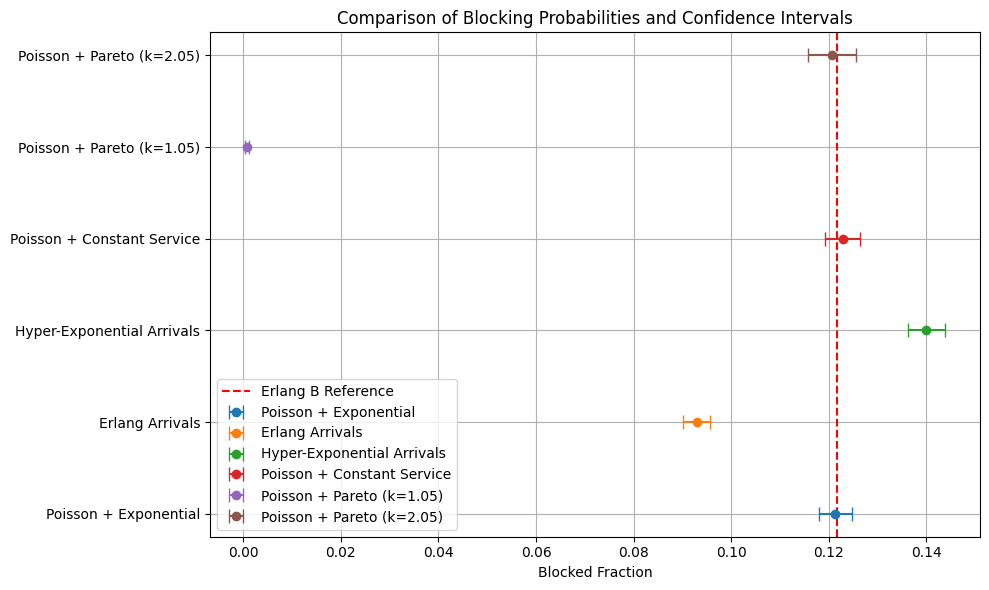

In [17]:
#4
comparison_data = {
    'Scenario': [
        'Poisson + Exponential',
        'Erlang Arrivals',
        'Hyper-Exponential Arrivals',
        'Poisson + Constant Service',
        'Poisson + Pareto (k=1.05)',
        'Poisson + Pareto (k=2.05)'
    ],
    'Mean': [
        0.12129,
        0.0929,
        0.1400,
        0.12282,
        0.00080,
        0.12072
    ],
    'CI Lower': [
        0.11789,
        0.0902,
        0.1362,
        0.1192,
        0.00035,
        0.1158
    ],
    'CI Upper': [
        0.12469,
        0.0956,
        0.1438,
        0.1264,
        0.00125,
        0.1256
    ]
}

df_compare = pd.DataFrame(comparison_data)

# Plot confidence intervals
plt.figure(figsize=(10, 6))
for i, row in df_compare.iterrows():
    plt.errorbar(x=row['Mean'], y=i, xerr=[[row['Mean'] - row['CI Lower']], [row['CI Upper'] - row['Mean']]],
                 fmt='o', capsize=5, label=row['Scenario'])

plt.yticks(ticks=range(len(df_compare)), labels=df_compare['Scenario'])
plt.axvline(x=0.1217, color='red', linestyle='--', label='Erlang B Reference')
plt.xlabel("Blocked Fraction")
plt.title("Comparison of Blocking Probabilities and Confidence Intervals")
plt.grid(True)
plt.tight_layout()
plt.legend(loc='lower left')
plt.show()
